#Deep Learning

##Undersampling with Convolution Neural Network

In [21]:
#libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [22]:
# Assuming 'df_cleaned' is your DataFrame containing the dataset
X = df_cleaned.drop(columns=['Brain Stroke'])
y = df_cleaned['Brain Stroke']

# Encode categorical features using pandas get_dummies
X_encoded = pd.get_dummies(X)

# Splitting the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [23]:
# Apply undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Ensure the data type is float32 for TensorFlow compatibility
X_train_resampled = X_train_resampled.astype(np.float32)
X_test = X_test.astype(np.float32)

# Reshape the input data for 1D CNN
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train_resampled, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[stopping])

Epoch 1/1000
31/31 [==============================] - 1s 11ms/step - loss: 0.7547 - accuracy: 0.6241 - val_loss: 0.7113 - val_accuracy: 0.5720
Epoch 2/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7405 - val_loss: 1.1346 - val_accuracy: 0.2757
Epoch 3/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7085 - val_loss: 0.4135 - val_accuracy: 0.8025
Epoch 4/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.5453 - accuracy: 0.7127 - val_loss: 0.2410 - val_accuracy: 0.9342
Epoch 5/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.5833 - accuracy: 0.7188 - val_loss: 0.4206 - val_accuracy: 0.8025
Epoch 6/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.5379 - accuracy: 0.7384 - val_loss: 0.6548 - val_accuracy: 0.6502
Epoch 7/1000
31/31 [==============================] - 0s 5ms/step - loss: 0.4909 - accuracy: 0.7611 - val_loss: 1.0262 - val_accuracy: 0.4321
Epoch

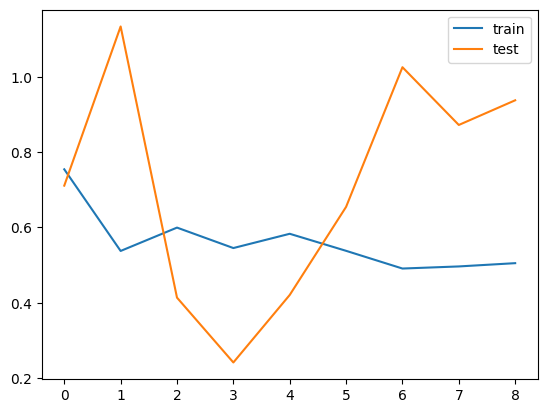

In [24]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [25]:
# Predict the target variable on the test data
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.round(y_pred_proba).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

253/253 [==============================] - 2s 6ms/step
Accuracy: 0.5415224913494809

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70      7919
           1       0.04      0.89      0.08       173

    accuracy                           0.54      8092
   macro avg       0.52      0.71      0.39      8092
weighted avg       0.98      0.54      0.68      8092


Confusion Matrix:
[[4228 3691]
 [  19  154]]
